# 環境構築 for 統計モデリング概論 DSHC 2022

岩嵜 航 (Watal M. Iwasaki, PhD)<br>
東北大学 生命科学研究科 進化ゲノミクス分野 特任助教

2022-08-17 東京海上 Data Science Hill Climb<br>

## 方針
ほかの講義で使っている環境をなるべくそのまま使う。

### Google Colab (Python 3.7.13) を使っている場合
各ipynbファイルの頭に `%pip install` コマンドを置いておくので、事前準備は不要。
念のため、このファイルが最後まで問題なく動くことを確認する。

### ローカルのPython 3.7.7を使っている場合
以下の手順でパッケージをいくつか追加する。

ほかの講義で入れたいくつかのパッケージのバージョンを上げてしまうので、
本講義が終わったら、ほかの講義に参加する前に再び
`pip3 install -r requirements.txt` を実行して指定バージョンに戻してください。

In [2]:
import sys
print(sys.version)

3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]


## パッケージのインストールと動作確認

ほかの講義でインストール済みだが古すぎるものを更新:

In [3]:
%pip install -U 'seaborn>=0.11'
%pip install -U 'matplotlib>=3.1'

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 498.2 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
Note: you may need to restart the kernel to use updated packages.


### [statsmodels](https://www.statsmodels.org)

In [4]:
%pip install 'statsmodels>=0.13.2'
import statsmodels.api as sm  # noqa: E402
sm.show_versions()

Note: you may need to restart the kernel to use updated packages.

INSTALLED VERSIONS
------------------
Python: 3.10.5.final.0
OS: Linux 5.10.104-linuxkit #1 SMP PREEMPT Thu Mar 17 17:05:54 UTC 2022 x86_64
byteorder: little
LC_ALL: en_US.UTF-8
LANG: en_US.UTF-8

statsmodels

Installed: 0.13.2 (/opt/conda/lib/python3.10/site-packages/statsmodels)

Required Dependencies

cython: 0.29.30 (/opt/conda/lib/python3.10/site-packages/Cython)
numpy: 1.22.4 (/opt/conda/lib/python3.10/site-packages/numpy)
scipy: 1.8.1 (/opt/conda/lib/python3.10/site-packages/scipy)
pandas: 1.4.3 (/opt/conda/lib/python3.10/site-packages/pandas)
    dateutil: 2.8.2 (/opt/conda/lib/python3.10/site-packages/dateutil)
patsy: 0.5.2 (/opt/conda/lib/python3.10/site-packages/patsy)

Optional Dependencies

matplotlib: 3.5.3 (/opt/conda/lib/python3.10/site-packages/matplotlib)
    backend: module://matplotlib_inline.backend_inline 
cvxopt: Not installed
joblib: 1.1.0 (/opt/conda/lib/python3.10/site-packages/joblib)

Develop

### [CmdStanPy](https://cmdstanpy.readthedocs.io)

In [5]:
%pip install 'cmdstanpy>=1.0.4'
import cmdstanpy
print(cmdstanpy.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
1.0.4


`fbprophet 0.7.1 requires cmdstanpy==0.9.5` だから conflict してるよ、
というERRORが出るかもしれないけど今回は `fbprophet` を使わないので無視。

[CmdStan](https://mc-stan.org/users/interfaces/cmdstan) 本体をインストール(数分かかるかも):

In [7]:
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.30.1
Install directory: /home/jovyan/.cmdstan
CmdStan version 2.30.1 already installed


True

バージョン 1.0.2, 1.0.3 では正常にインストールされていても
`ValueError: CmdStan installataion missing binaries.`
というエラーが出る。その上のほうに
`CmdStan version 2.**.* already installed` と表示されていればOK。
バージョン 1.0.4 で修正済み。

[公式example](https://github.com/stan-dev/cmdstanpy#example) が走ることを確認:

In [8]:
import os
from cmdstanpy import cmdstan_path, CmdStanModel

# specify locations of Stan program file and data
stan_file = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.stan')
data_file = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.data.json')

# instantiate a model; compiles the Stan program by default
model = CmdStanModel(stan_file=stan_file)

# obtain a posterior sample from the model conditioned on the data
fit = model.sample(chains=4, data=data_file)

# summarize the results (wraps CmdStan `bin/stansummary`):
fit.summary()

14:11:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:11:03 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-7.274370,0.01812,0.731273,-8.782090,-6.991790,-6.750420,1628.75,3841.40,1.001980
theta,0.249957,0.00296,0.120006,0.080227,0.232886,0.472531,1643.21,3875.49,0.999451


### [ArviZ](https://python.arviz.org/)

In [9]:
%pip install 'arviz>=0.12.1'
import arviz as az  # noqa: E402
print(az.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.2/927.2 kB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 10.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
0.12.1


上記exampleの可視化:

array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

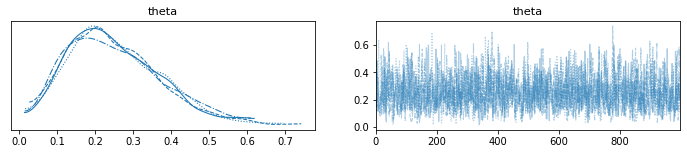

In [10]:
cmdstanpy_data = az.from_cmdstanpy(fit)
az.plot_trace(cmdstanpy_data)

In [11]:
# pyright: reportMissingTypeStubs=false
# pyright: reportPrivateImportUsage=false
# pyright: reportUnknownArgumentType=false
# pyright: reportUnknownMemberType=false
# pyright: reportUnknownVariableType=false